# Plan

## First thing's first, some additional cleaning while exploring some of the data
1. (DONE) drop redundant columns

2. (DONE) 'restrictions_yn' binary 0 for Na's (no restrictions), 1 for has restrictions. Restrictions were given in species descriptions and counts based on weight (i.e. 'up to 30 pounds' or something)

3. (DONE, EXPLANATION UNDERNEATH NEEDED) descriptive stats for numerical variables

   a. should I change 'restrictions' column to binary 0 and 1? or just the weight int? probs need to change though

4. look at categorical variables' value_counts(), see if I can recategorize any to lower amt of unique elements

   a. (DONE) location (removed 4 categories with low volume and relevancy)
   
   b. boat_name (not yet sure how to handle, might just drop entirely)
   
   c. (DONE) trip_type

5. (DONE for now) catch_species:
   
   a. (DONE) misnamed/mistyped common names, need to merge
   
   b. (DONE) generalizing species (i.e. all sharks, all rockfish...)

## Questions worth answering
1. What are the most popular species by:

    a. trip type?

    b. location?
    
    c. boat name?

    d. time of year (month)?

    e. combos, i.e. location and trip type, such as 3/4 trips out of San Diego?

2. are catches across locations correlated?

3. can we predict how many fish of any given species will be caught each month in each location?

4. can we predict how many fish will be released in any given month in each location?



In [506]:
#import packages and set wd to sportfishingreport_project folder
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.chdir("C:/Users/Kevin/Documents/Projects/Portfolio/sportfishingreport_project")

In [507]:
#read in data
df_raw = pd.read_csv("sfr_data_cleaned.csv")
df = df_raw.copy()

In [508]:
#overview of first 3 columns
print(df.head(3), '\n')
print('Dataframe dimensions: ', df.shape, '\n')
print('Column types:', '\n', df.dtypes, sep = '')

         date       location    boat_name      trip_type num_anglers  \
0  2020-01-01  central coast  new horizon  full day trip  12 Anglers   
1  2020-01-01  central coast  new horizon  full day trip  12 Anglers   
2  2020-01-01    los angeles   native sun   3/4 day trip  21 Anglers   

                                               catch       date2  year  month  \
0                     23 Dungeness Crab, 215 Sanddab  2020-01-01  2020      1   
1                     23 Dungeness Crab, 215 Sanddab  2020-01-01  2020      1   
2  25 Sand Bass, 65 Blacksmith, 1 Halibut, 15 Scu...  2020-01-01  2020      1   

   day day_of_week  anglers  released restrictions  catch_count  \
0    1   Wednesday       12         0          NaN         23.0   
1    1   Wednesday       12         0          NaN        215.0   
2    1   Wednesday       21         0          NaN         25.0   

    catch_species  
0  dungeness crab  
1         sanddab  
2       sand bass   

Dataframe dimensions:  (62369, 16) 

In [509]:
#drop redundant columns
df = df.drop(['date', 'catch', 'num_anglers'], axis = 1)
df['restrictions_yn'] = df['restrictions'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [510]:
#column names
df.columns

Index(['location', 'boat_name', 'trip_type', 'date2', 'year', 'month', 'day',
       'day_of_week', 'anglers', 'released', 'restrictions', 'catch_count',
       'catch_species', 'restrictions_yn'],
      dtype='object')

## LOCATION CLEANING

### Can I recategorize or remove any?

In [511]:
#look at categorical columns to see unique values and # instances
df.location.value_counts()

san diego           18652
los angeles         11346
ventura coast       10081
orange               9680
central coast        6397
bay area             5259
washington coast      468
north coast           208
oregon coast          198
lake tahoe             39
delta                  38
puget sound             2
florida south           1
Name: location, dtype: int64

In [512]:
#remove the florida south, puget sound, lake tahoe, and delta ones since there's so little data
location_list = ['florida south', 'puget sound', 'delta', 'lake tahoe']
df.drop(df.loc[df['location'].isin(location_list)].index, inplace = True) #removes rows

In [513]:
#double check to make sure rows were deleted
df.location.value_counts()

san diego           18652
los angeles         11346
ventura coast       10081
orange               9680
central coast        6397
bay area             5259
washington coast      468
north coast           208
oregon coast          198
Name: location, dtype: int64

In [514]:
#yep removed 80 rows
print(df.shape)

(62289, 14)


## trip_type CLEANING

### Can I recategorize or remove any?

In [515]:
#trip types, pretty hard to ideentify if trips are the same type or not
#ex: 3/4 day local vs 3/4 day islands vs 3/4 day trip, all 3/4 (probs SD trips too)
#targetting different species based on location, so should they be categorized together or not?
#trip_type counts drastically drop off after 3/4 day trip, though expected that there are less
#overnight and greater trips
df.trip_type.value_counts()

1/2 day trip             21305
full day trip            15748
3/4 day trip             14193
overnight trip            6121
1.5 day trip              1869
2 day trip                1109
2.5 day trip               743
12 hour                    246
salmon trolling            233
3 day trip                 193
1.75 day trip              122
3.5 day trip               119
crab combo                  73
5 hour                      42
3/4 day islands             27
7 hour                      18
extended 1.5 day trip       17
dungeness crab              10
5 day trip                   9
3/4 day local                9
4 day trip                   7
crab                         7
lobster                      5
6 hour                       3
4 hour                       3
salmon mooching              2
2.75 day trip                2
8 hour                       2
halibut                      1
dungeness crab am            1
salmon                       1
offshore halibut             1
Name: tr

In [516]:
pd.set_option('display.max_rows', 500)

df[['location', 'trip_type']].groupby(['trip_type', 'location']).size().reset_index().rename(columns = {0: 'count'}) \
    .sort_values(['trip_type', 'location'], ascending = [True, True])

,trip_type,location,count
0,1.5 day trip,los angeles,146
1,1.5 day trip,orange,103
2,1.5 day trip,san diego,1613
3,1.5 day trip,ventura coast,7
4,1.75 day trip,san diego,122
5,1/2 day trip,bay area,244
6,1/2 day trip,central coast,2987
7,1/2 day trip,los angeles,3860
8,1/2 day trip,north coast,35
9,1/2 day trip,orange,4846


In [517]:
#reset display option to default
pd.reset_option('display.max_rows')

### Notes from trip_type and location grouping:
 * 1.5 day trips are CA only (LA, OC, SD, Ventura) 5th largest trip_type
 * 1/2 day trip is universal across the coast I think (present in all 3 states), largest trip type
 * 2 day trips are CA only (LA, OC, SD, Ventura) 6th largest trip_type
 * 2.5 day trip is LA and SD only, LA only 15 of them but 7th largest trip_type so worth keeping
 * 3/4 day trip is only CA but 3rd largest trip_type
 * overnight trip (LA, OC, SD, Ventura) only
 * full day trips are everywhere, second most popular trip

### Actionable:
 * x.75 day trips are SD only (only 2 types, 1.75 (122 trips) and 2.75 (2 trips, maybe can delete or round up to 3 day))
 * 12 hour is ONLY central coast change to full day
 * 3 day, 3.5 day trips only available in SD and Ventura. Maybe merge anything greater than 2.5 day into one "long" cat? only 7 4 day trips (SD only), 9 5 day trips (SD only)
 * 4 hour trip is central coast only, only 3 trips (relabel as half day?)
 * 7 hour trip also only central coast, 18 trips total? can see if this still exists or not, relabel 3/4
 * 5 hr (42 trips), 6 hr (3 trips), 8 hr (2 trips) all oregon coast only, merge 8 with 3/4 (?) and 5-6 with 1/2 day
 * extended 1.5 day is SD only, merge with 1.5 day
 * all crab and salmon trips are bay area only, can probs merge all crab into one and salmon into one

### Unsure how to handle:
 * 3/4 island, 3/4 local, and 3/4 day trip - how to handle? Ventura and SD both have "islands" trips, but diff islands
 * only 2 halibut trip (1 bay area, 1 "offshore halibut" oregon coast), might delete? check on this one
 * only 5 lobster trip (LA), might delete? check on this one

### Changes made:
 * Anything 3+ days is "multi-day trip"
 * ".75" day trips rounded up (really only applies to a few trips from SD)
 * "12 hour" trips recoded to "full day trip"
 * "4 hour", "5 hour", and "6 hour" trips recoded to "1/2 day trip"
 * "7 hour" and "8 hour" trips recoded to "3/4 day trip"
 * "3/4 day local" and "3/4 day islands" recoded to "3/4 day trip" because only 36 trips total
 * "extended 1.5 day trip" recoded to "1.5 day trip" (again only applies to a few trips from SD)
 * all crab trips recoded to "crabbing trip"
 * all salmon trips recoded to "salmon trip"
 * all other species-specific indicating trips recoded to "other trip"
 

In [518]:
#function to replace trip_type according to above notes

def trip_type_simplifier(trip_type):
    if trip_type == '2.75 day trip':
        return 'multi-day trip'
    elif trip_type == '1.75 day trip':
        return '2 day trip'
    elif trip_type == '12 hour':
        return 'full day trip'
    #elif trip_type == '4 day trip' or trip_type == '5 day trip':
    elif trip_type in ['3 day trip', '3.5 day trip', '4 day trip', '5 day trip']:
        return 'multi-day trip'
    #elif trip_type == '4 hour' or trip_type == '5 hour' or trip_type == '6 hour':
    elif trip_type in ['4 hour', '5 hour', '6 hour']:
        return '1/2 day trip'
    #elif trip_type == '7 hour' or trip_type == '8 hour':
    elif trip_type in ['7 hour', '8 hour', '3/4 day local', '3/4 day islands']:
        return '3/4 day trip'
    elif trip_type == 'extended 1.5 day trip':
        return '1.5 day trip'
    elif trip_type in ['crab', 'crab combo', 'dungeness crab', 'dungeness crab am']:
        return 'crabbing trip'
    elif trip_type in ['salmon', 'salmon mooching', 'salmon trolling']:
        return 'salmon trip'
    elif trip_type in ['lobster', 'halibut', 'offshore halibut']:
        return 'other trip'
    elif trip_type == None:
        return 'na'
    else:
        return trip_type

In [519]:
#apply function to trip_type
df['trip_type'] = df['trip_type'].apply(trip_type_simplifier)

In [520]:
pd.set_option('display.max_rows', 500)

print(df.trip_type.value_counts(), '\n')

print(df[['location', 'trip_type']].groupby(['trip_type', 'location']).size().reset_index().rename(columns = {0: 'count'}) \
    .sort_values(['trip_type', 'location'], ascending = [True, True]))


1/2 day trip      21353
full day trip     15994
3/4 day trip      14249
overnight trip     6121
1.5 day trip       1886
2 day trip         1231
2.5 day trip        743
multi-day trip      330
salmon trip         236
crabbing trip        91
other trip            7
Name: trip_type, dtype: int64 

         trip_type          location  count
0     1.5 day trip       los angeles    146
1     1.5 day trip            orange    103
2     1.5 day trip         san diego   1630
3     1.5 day trip     ventura coast      7
4     1/2 day trip          bay area    244
5     1/2 day trip     central coast   2990
6     1/2 day trip       los angeles   3860
7     1/2 day trip       north coast     35
8     1/2 day trip            orange   4846
9     1/2 day trip      oregon coast     67
10    1/2 day trip         san diego   8218
11    1/2 day trip     ventura coast   1074
12    1/2 day trip  washington coast     19
13      2 day trip       los angeles    109
14      2 day trip            orange    114


In [521]:
#reset display option to default
pd.reset_option('display.max_rows')

## SPECIES CLEANING

### Are there duplicated species that we can consolidate to lessen the number of unique elements?
 * multiple types of rockfish are present, can probably consolidate to "rockfish". Or create a new column called rockfish_type (or rockfish_species?) that indicates what type of rockfish, 0 for non-rockfish
 * couple different types of bass (calico, kelp, sand, barred sand, spotted bay...)
 * some duplicates (barred sand bass, flounder) that appear in 2 rows of value_counts but seems like they shouldn't?
 * couple different types of croaker (yellowfin croaker, white croaker...)
 * salmons (coho, king, chinook...)
 
### Typos/alternate names:
 * (DONE) strip leading/trailing whitespace from catch_species
 * ROCKFISH:
         * (DONE) 'vermillion rockfish' should be 'vermilion rockfish' (only 1 'l')
         * (preemptively done) 'rockcod' and 'rockfish' are the same? check with Noah or Travis
 * SALMON:
         * (DONE) 'chinoook salmon' has an extra 'o'
         * (DONE) chinook changed to king
 * (DONE) 'california yellowtail' and 'yellowtail' same
 * (DONE) Mahi mahi changed to dorado
 * (DONE) 'blacksmith' changed to 'blacksmith perch'
 * (DONE) 'halfmoon' and 'halfmoon perch' recoded to 'blue perch'
 * (DONE) 'dungeoness crab' to 'dungeness crab'
 * (DONE) 'pacific bonito' to 'bonito'
 * (DONE) 'albacore' to 'albacore tuna'
 * (DONE) 'dog fish shark' and 'spiny dogfish shark' to 'spiny dogfish shark'
 * (DONE) 'red rock crab' to 'rock crab'
 * (DONE) 'salmon grouper' to 'bocaccio'
 * (DONE) 'bolina' to 'greenspotted rockfish'
 * (DONE) 'ocean whitefish' to 'whitefish'
 * (DONE) 'spanish jack' to 'jack mackerel' NOT SURE ABOUT HOW TO CATEGORIZE THESE BAITFISH
 * (DONE) 'spanish mackerel' to 'mackerel' NOT SURE ABOUT HOW TO CATEGORIZE THESE BAITFISH
 * (DONE) 'giant seabass' mapped to 'black seabass'
 
### Generalizations:
 * All rockfish to "rockfish", including bocaccio, bolina, and treefish
 * All salmon to "salmon" (except salmon grouper, idk what this is yet)
 * All basses to "bass" (excl. white seabass, black seabass, other huge basses)
 * All halibut to "halibut" (Pacific, California, unspecified)
 * All crab to "crab"
 * All perch to "perch"
 * All sharks to "shark"
 * All tuna to "tuna" (should include yellowfin, bluefin, skipjack, albacore, bigeye)
 * All marlin and swordfish to "billfish"
 * All mackerel and jacks to "baitfish"
 
 
### Possible to-do:
 * create new column to generalize species
 * might be interesting to create new column about species' preferred habitat but not sure
 
### Unsure how to handle?
 * bigger seabasses
         * black seabass (19 instances)
         * lots of white seabass in separate category, don't think should merge because black is endangered/illegal to keep I believe
 * croakers
         * black croaker (34 instances)
         * white croaker (4 instances)
         * yellowfin croaker (1 instance)
 * sole/flounder? not sure if flounder here refers to sole or not on sportboats...
         * petrale sole
         * sand sole (is this a sanddab...? or flounder??)
         * starry flounder (4 instances)
         * flounder (2 instances)
 * other?
         * opaleye (49 instances)
         * sargo (34 instances)
         * white sturgeon (13 instances)
         * kelp greenling (5 instances)
         * bonefish (1 instance)
         * opah (1 instance)
         * wolf eel (9), bat ray (2), octopus (1), diamond turbot (1)

In [522]:
#fixing typos first
def species_typo_fixer(catch_species):
    #fish
    if 'rockcod' in catch_species:
        return catch_species.replace('rockcod', 'rockfish')
    elif 'vermillion' in catch_species:
        return catch_species.replace('vermillion', 'vermilion')
    elif catch_species == 'salmon grouper':
        return 'bocaccio'
    elif catch_species == 'kelp bass':
        return 'calico bass'
    elif catch_species == 'barred sand bass':
        return 'sand bass'
    elif catch_species == 'blacksmith':
        return 'blacksmith perch'
    elif 'halfmoon' in catch_species:
        return 'blue perch'
    elif catch_species == 'ocean whitefish':
        return 'whitefish'
    elif catch_species in ['chinook salmon', 'chinoook salmon']:
        return 'king salmon'
    elif catch_species == 'mahi mahi':
        return 'dorado'
    elif catch_species == 'california yellowtail':
        return 'yellowtail'
    elif 'bonito' in catch_species:
        return 'bonito'
    elif 'albacore' in catch_species:
        return 'albacore tuna'
    elif catch_species == 'giant seabass':
        return 'black seabass'
    #not sure about these two
    elif catch_species == 'spanish jack':
        return 'jack mackerel'
    elif catch_species == 'spanish mackerel':
        return 'mackerel'
    
    #crab
    elif catch_species == 'dungeoness crab':
        return 'dungeness crab'
    elif catch_species == 'red rock crab':
        return 'rock crab'
    
    #shark
    elif 'dog' in catch_species:
        return 'spiny dogfish shark'
    
    else:
        return catch_species

In [523]:
#strip leading/trailing whitespace from catch_species
#df_test = df.copy() #for testing purposes
df.catch_species = df.catch_species.apply(lambda x: x.strip() if pd.notnull(x) else x)

#run catch_species through typo fixer
df['catch_species'] = df['catch_species'].apply(lambda x: species_typo_fixer(x) if pd.notnull(x) else x)

pd.set_option('display.max_rows', 500)
print(df_test.catch_species.value_counts())

rockfish               8951
calico bass            6911
whitefish              5254
sheephead              4341
sculpin                4205
yellowtail             3757
lingcod                3686
sand bass              2840
bonito                 2459
yellowfin tuna         1817
bluefin tuna           1778
barracuda              1718
king salmon            1627
red rockfish           1418
dorado                 1321
halibut                 971
bocaccio                923
copper rockfish         891
blue perch              843
vermilion rockfish      684
dungeness crab          644
skipjack tuna           609
sanddab                 413
white seabass           384
lobster                 367
california halibut      351
striped bass            330
blacksmith perch        315
bolina                  256
cabezon                 247
triggerfish             235
rock sole               199
red snapper             159
treefish                 99
mackerel                 94
petrale sole        

In [587]:
#function to replace catch_species according to above notes

def species_generalizer(catch_species):
    #fish
    #rockfish
    if 'rockfish' in catch_species:
        return 'rockfish'
    if catch_species in ['bocaccio', 'bolina', 'treefish']: #also rockfish
        return 'rockfish'
    #bass, should not include white and black seabass, other huge basses
    elif catch_species in ['calico bass', 'kelp bass', 'sand bass', 'barred sand bass', 'striped bass', 'spotted bay bass']:
        return 'bass'
    #perch
    elif 'perch' in catch_species:
        return 'perch'
    #salmon
    elif catch_species in ['king salmon', 'silver salmon', 'coho salmon']:
        return 'salmon'
    #halibut
    elif 'halibut' in catch_species:
        return 'halibut'
    #tuna
    elif catch_species in ['yellowfin tuna', 'bigeye tuna', 'bluefin tuna', 'skipjack tuna', 'albacore tuna']:
        return 'tuna'
    #CHECK THIS ONE TO MAKE SURE IT WORKS
    #swordfish and marlin
    elif 'swordfish' in catch_species or 'marlin' in catch_species:
        return 'billfish'
    
    #baitfish
    elif 'mackerel' in catch_species:
        return 'baitfish'

    #sharks
    elif 'shark' in catch_species:
        return 'shark'

    
    #crab
    elif 'crab' in catch_species:
        return 'crab'
    
    #other
    elif catch_species in ['black croaker', 'sargo', 'black seabass', 'billfish', 'white sturgeon', 'sand sole', \
                           'wolf eel', 'kelp greenling', 'white croaker', 'starry flounder', 'flounder', 'bat ray', \
                           'bonefish', 'octopus', 'diamond turbot', 'opah', 'yellowfin croaker']:
        return 'other'

    #to catch others and na's, but wonder if i can replace above with the below as else return other?
    else:
        return catch_species

In [588]:
#run catch_species through generalizer
df['catch_species_gen'] = df_test['catch_species'].apply(lambda x: species_generalizer(x) if pd.notnull(x) else x)

pd.set_option('display.max_rows', 500)
df.catch_species_gen.value_counts()

rockfish         13471
bass             10082
whitefish         5254
sheephead         4341
tuna              4225
sculpin           4205
yellowtail        3757
lingcod           3686
bonito            2459
barracuda         1718
salmon            1690
halibut           1393
dorado            1321
perch             1225
crab               730
sanddab            413
white seabass      384
lobster            367
cabezon            247
triggerfish        235
rock sole          199
red snapper        159
other              143
baitfish           121
petrale sole        87
shark               57
opaleye             49
billfish            16
Name: catch_species_gen, dtype: int64

## FINALLY getting into the exploring part of explorative data analysis!

### To-do:
#### Continuous variables:

Only 2 relevant ones: num_anglers, catch_count. Date variables don't need descriptives
 * Descriptive stats
 * Histograms
 * Boxplots
 
#### Categorical variables:

location, boat_name, trip_type, catch_species

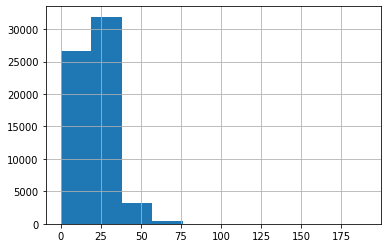

In [526]:
#descriptive stats for anglers and catch_count
df.anglers.hist()

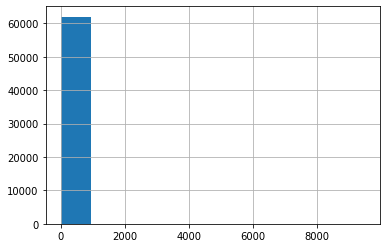

In [527]:
df.catch_count.hist()

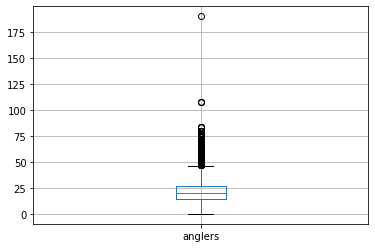

In [528]:
#boxplots
df.boxplot(column = 'anglers')

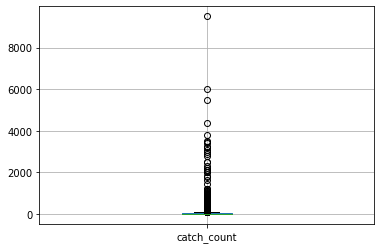

In [529]:
#catch_count boxplot
df.boxplot(column = 'catch_count')

#there's some weird catch in the thousands rows for some reason, not sure what happened there but that's not true
#delete rows above what threshold?

In [530]:
#correlation btw continuous variables
df[['catch_count', 'anglers']].corr()

,catch_count,anglers
catch_count,1.000000,0.095512
anglers,0.095512,1.000000


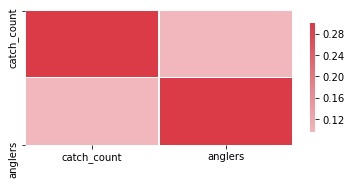

In [591]:
#plotting corr using seaborn, don't need this really for just 2 variables but for future reference
#helpful to visualize correlations, esp because in regressions, important to reduce multicollinearity
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[['catch_count', 'anglers']].corr(), vmax = 0.3, center = 0, cmap = cmap,
            square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

In [589]:
#categorical data:
df.columns
cat_col = ['location', 'trip_type', 'day_of_week', 'released', 'catch_species', 'catch_species_gen', 'restrictions_yn']

#df with categorical columns only
df_cat = df[cat_col]

graph for location: total = 9


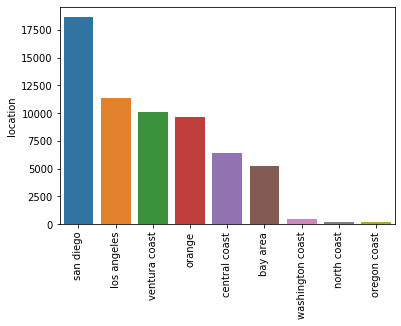

graph for trip_type: total = 11


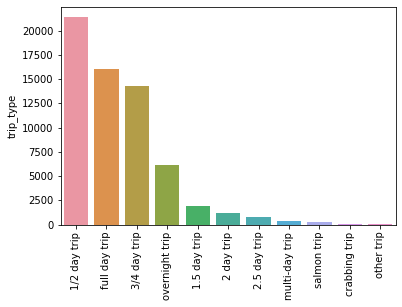

graph for day_of_week: total = 7


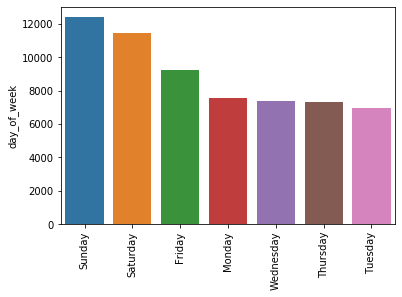

graph for released: total = 2


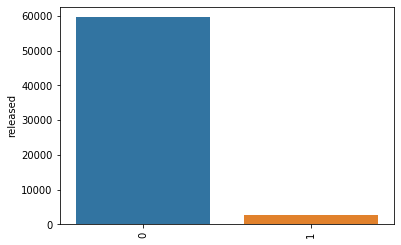

graph for catch_species: total = 86


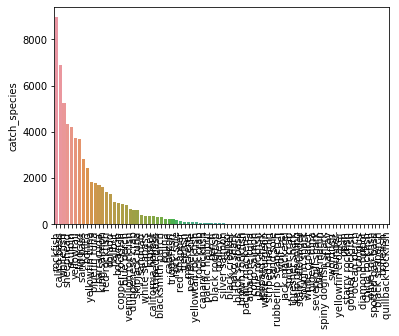

graph for catch_species_gen: total = 28


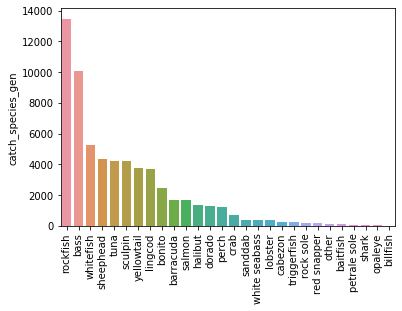

graph for restrictions_yn: total = 2


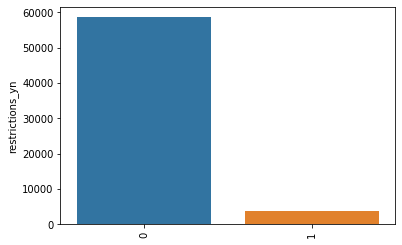

In [590]:
#loop through categorical df to make some exploratory charts

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

graph for catch_species: total = 20


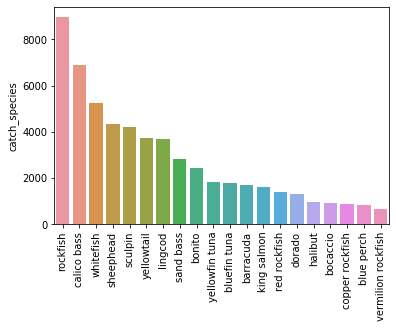

graph for catch_species_gen: total = 20


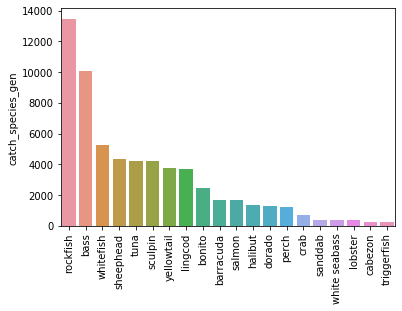

In [592]:
#species plots in more detail
for i in df_cat[['catch_species', 'catch_species_gen']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [593]:
#pivot tables
pd.pivot_table(df, index = ['location', 'trip_type'], values = 'catch_count', aggfunc = np.sum)
#help(pd.pivot_table)

catch_count
location         trip_type                  
bay area         1/2 day trip         9236.0
                 3/4 day trip          288.0
                 crabbing trip       17082.0
                 full day trip      290784.0
                 other trip             17.0
                 salmon trip          3483.0
central coast    1/2 day trip       132713.0
                 3/4 day trip        69249.0
                 full day trip      103957.0
los angeles      1.5 day trip         4725.0
                 1/2 day trip       179097.0
                 2 day trip           3921.0
                 2.5 day trip          611.0
                 3/4 day trip       219444.0
                 full day trip       38709.0
                 other trip            111.0
                 overnight trip      61691.0
north coast      1/2 day trip         2330.0
                 full day trip        4167.0
orange           1.5 day trip         3403.0
                 1/2 day trip       107760.0
                 2 day trip           5862.0
                 3/4 day trip       100603.0
                 full day trip       21486.0
                 overnight trip      22728.0
oregon coast     1/2 day trip         1281.0
                 3/4 day trip           34.0
                 full day trip        5735.0
                 other trip             11.0
san diego        1.5 day trip        49241.0
                 1/2 day trip       204060.0
                 2 day trip          34997.0
                 2.5 day trip        32875.0
                 3/4 day trip        42188.0
                 full day trip       80262.0
                 multi-day trip      16469.0
                 overnight trip      51226.0
ventura coast    1.5 day trip          158.0
                 1/2 day trip        76389.0
                 2 day trip          12830.0
                 3/4 day trip       276789.0
                 full day trip      102343.0
                 multi-day trip       4679.0
                 overnight trip     105132.0
washington coast 1/2 day trip          642.0
                 full day trip       20380.0

## Questions worth answering

1. What are the most productive (by species):

    a. trip type?
    b. location?
    c. boat name?
    d. time of year (month)?
    e. combos, i.e. location and trip type, such as 3/4 trips out of San Diego?

2. are catches across locations correlated?

3. analysis of ridership (need to group to boat level instead of catch level, otherwise will double count a lot):
    
    a. which trip type attracts the most anglers?
    b. which location attracts the most anglers? (adjust by population?)
    c. which time of year attracts the most anglers? in each region?

3. can we predict how many fish of any given species will be caught each month in each location?

4. can we predict how many fish will be released in any given month in each location?



In [594]:
#iterate through list of pivot tables to answer Q1, catch only. ignore number of anglers for now

df_pivots = df[['catch_count', 'catch_species', 'catch_species_gen', 'location', 'trip_type', \
             'month', 'year', 'day_of_week', 'released', 'restrictions_yn', 'restrictions']]

#interative pivot tables
for i in df_pivots.iloc[:, 1:].columns:
        print(i)
        print(pd.pivot_table(df_pivots, index = i, values = 'catch_count', aggfunc = np.sum) \
              .sort_values('catch_count', ascending = False), '\n\n\n')

        


catch_species
                     catch_count
catch_species                   
rockfish                964486.0
whitefish               287550.0
calico bass             205755.0
sanddab                 135817.0
sculpin                 131684.0
bonito                  107169.0
dungeness crab           94209.0
yellowtail               85043.0
red rockfish             70912.0
yellowfin tuna           62450.0
bluefin tuna             43221.0
dorado                   40262.0
sand bass                29167.0
lingcod                  27713.0
vermilion rockfish       27695.0
sheephead                25505.0
king salmon              21455.0
barracuda                20129.0
skipjack tuna            16175.0
bocaccio                 15477.0
blacksmith perch         14561.0
blue perch               14312.0
copper rockfish          12853.0
halibut                   9401.0
lobster                   9243.0
yellowtail rockfish       8982.0
bolina                    6568.0
california halibut        523

## NOTES ABOUT ABOVE:

* rockfish are most popular species by volume (makes sense)
* calico bass are also very popular, I wonder how many they keep vs release?
* yellowtail 8th most caught species on whole west coast, curious about where it places in socal only? in SD only?
    * additionally, it's second most caught bigger sportfish after bonito. rockfish and calico I would consider to be smaller sportfish?
    * when generalizing species, tuna catch is greater than yellowtail catch and bonito catch. interesting!
* ventura coast caught the most fish total, how about per boat?
    * SD second, less and less as you go up the coast. what about population adjusted or boat adjusted?
* 1/2 day caught the most fish (def because most trips and mostly targeting rockfish, easier to pull)
    * trip type x species pivot would be interesting
* summer and fall months definitely the most productive.
    * NOTE: APRIL MISSING BECAUSE 2020 WAS COVID YEAR SO SPORT BOATS SHUT DOWN
    * probably will be more interesting to look at this over time. But also interesting to see the amount of fish kept in the water due to COVID?
* weekends are the most productive, Sat Sun Fri (in order), Tue Wd Thu least productive (makes sense)
* about 5% of fish are released, curious how that changes by species

## Questions about above:

* where are they catching 'whitefish'??? I didn't think it would be the second highest catch volume
* keeper vs released ratios by species? by region too?

## Actions:

* Pretty much need to look at everything with a species split (below)
* also, would be interesting to look at ridership. Need to figure out how to group by boat to avoid double counting

In [596]:
#pivoted on species

df_pivots = df[['catch_count', 'catch_species', 'catch_species_gen', 'location', 'trip_type', \
             'month', 'year', 'day_of_week', 'released', 'restrictions_yn', 'restrictions']]

#interative pivot tables
for i in df_pivots.iloc[:, 3:].columns:
        print(i)
        print(pd.pivot_table(df_pivots, index = 'catch_species_gen', columns = i, values = 'catch_count', \
                             aggfunc = np.sum), '\n\n\n')


location
location           bay area  central coast  los angeles  north coast   orange  \
catch_species_gen                                                               
baitfish                7.0         1146.0       1767.0          NaN    110.0   
barracuda               NaN            NaN       8920.0          NaN   2925.0   
bass                 4005.0            6.0      45104.0          NaN  84649.0   
billfish                NaN            NaN          3.0          NaN      NaN   
bonito                  NaN           18.0      52477.0          NaN  36960.0   
cabezon               200.0          163.0         17.0          1.0     21.0   
crab                89202.0         3322.0         50.0        750.0      NaN   
dorado                  NaN            NaN        184.0          NaN    626.0   
halibut             13271.0           58.0        146.0        322.0    118.0   
lingcod             11023.0         3611.0       1242.0        511.0     42.0   
lobster            

## Notes on pivoting with species:

* LA caught the most barracuda, double SD's amount. Mostly SCB fish, none in WA or OR
* SD and OC caught around 85k bass each (!), LA 45k Ventura 19k. Also appears to be a SCB fish
* LA had the most bonito by a lot (52k vs SD 16k). Also appears to be a SCB fish
* Bay had the most cabezon, appears to be a central coast/bay area fish. Not too many in OR, non in WA, few in SoCal getting sparser as you go south
* almost all the crab is taken in the Bay, which is interesting. I would have thought there was more in WA/OR?

* need to normalize:
    * trip level by number of trips
    * location possibly by population or number of trips or number of anglers
    * possibly month by number of anglers?
    * possibly day of week by number of trips run?
    * I MIGHT NEED TO BUILD IN A TRIP INDICATOR (1 OR 2) ON DATA COLLECTION SCRIPT...

* released and restrictions (probably rename restrictions to something else or delete altogether) don't need normalizing?


In [616]:
#group by boat and species?
test = df.loc[(df['location'] == 'san diego') & (df['month'] == 8)][0:100]

print(test.columns)

print(test.shape)

print(test.groupby(['boat_name', 'date2']).mean())

print(test.loc[test['boat_name'] == 'electra'])



Index(['location', 'boat_name', 'trip_type', 'date2', 'year', 'month', 'day',
       'day_of_week', 'anglers', 'released', 'restrictions', 'catch_count',
       'catch_species', 'restrictions_yn', 'catch_species_gen'],
      dtype='object')
(100, 15)
                               year  month  day    anglers  released  \
boat_name        date2                                                 
alicia           2020-08-01  2020.0    8.0  1.0  15.000000      0.00   
apollo           2020-08-01  2020.0    8.0  1.0  22.000000      0.00   
                 2020-08-02  2020.0    8.0  2.0  15.000000      0.00   
aztec            2020-08-01  2020.0    8.0  1.0  26.000000      0.00   
blue horizon     2020-08-01  2020.0    8.0  1.0  18.000000      0.00   
                 2020-08-02  2020.0    8.0  2.0  13.000000      0.00   
chubasco ii      2020-08-01  2020.0    8.0  1.0  21.000000      0.00   
constitution     2020-08-01  2020.0    8.0  1.0  22.000000      0.00   
daily double     2020-08-01  